In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras import layers
import tensorflow as tf 
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import OneHotEncoder
import tensorflow.keras as keras
from tensorflow.keras.layers import Concatenate, Dense, Input, LSTM, Embedding, Dropout, Activation, GRU, Flatten
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Convolution1D
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from sklearn.metrics import roc_curve, auc, confusion_matrix,accuracy_score,precision_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
review_df = pd.read_pickle('food_review_places.pickle')

In [3]:
review_df['rating'].value_counts()

5.0    34487
4.0    19041
3.0     8118
2.0     5010
1.0     3539
Name: rating, dtype: int64

In [4]:
review_df

,gPlusPlaceId,rating,reviewerName,reviewText,categories,unixReviewTime,reviewTime,gPlusUserId,name,price,...,hours,phone,closed,gps,lat,long,open_days,Dinner,Lunch,Breakfast
0,112181651134020562716,5.0,jason wagner,stop dinner mahi mahi special fantast servic g...,"[european restaurant, italian restaurant]",2012-10-18 21:56:05,2012-10-18,100000196778399872657,Pasquales Trattoria,None,...,"[[Monday, [['Closed']]], [Tuesday, [['11:30 am...",(905) 338-9090,False,"[43.440331, -79.672851]",43.440331,-79.672851,6.0,1.0,0.0,0.0
1,109391653021436219474,5.0,heather goldsworthy,best coffe collingwood,[cafe],2013-09-12 18:38:15,2013-09-12,100000427343266187570,Espresso Post,None,...,None,(705) 446-1740,False,"[44.499252, -80.216587]",44.499252,-80.216587,NaN,NaN,NaN,NaN
2,109391653021436219474,5.0,nicholas clayton,locat old post offic outlet histor pedigre bes...,[cafe],2013-05-04 01:35:12,2013-05-03,104975196938413074237,Espresso Post,None,...,None,(705) 446-1740,False,"[44.499252, -80.216587]",44.499252,-80.216587,NaN,NaN,NaN,NaN
3,110864889964667973890,5.0,chris johnson,get right everi time love guy,"[delivery restaurant, event planner, business ...",2011-09-15 21:54:03,2011-09-15,100000524810171549476,"Delivered Dish | Portland, OR",$$,...,"[[Monday, [['8:00 am--9:00 pm']]], [Tuesday, [...",(503) 239-0100,False,"[45.470342, -122.747085]",45.470342,-122.747085,7.0,1.0,0.0,0.0
4,110864889964667973890,1.0,allison lea,use servic order even show 1 hour 20 minut pro...,"[delivery restaurant, event planner, business ...",2013-11-09 10:28:01,2013-11-08,100537426867747151661,"Delivered Dish | Portland, OR",$$,...,"[[Monday, [['8:00 am--9:00 pm']]], [Tuesday, [...",(503) 239-0100,False,"[45.470342, -122.747085]",45.470342,-122.747085,7.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70190,113840395279665001642,5.0,ture jackson,great,[cafe],2012-06-10 03:18:34,2012-06-09,106224892970344797880,Second Cup,None,...,"[[Monday, [['8:00 am--9:00 pm']]], [Tuesday, [...",(604) 514-5085,True,"[49.121205, -122.668297]",49.121205,-122.668297,7.0,1.0,0.0,1.0
70191,108887431842899649801,4.0,tomasz w,surprisingli good mere 14 buck get larg pizza ...,[delivery restaurant],2013-11-16 05:42:46,2013-11-15,106224899821829244630,Little Caesars Pizza,$$$,...,"[[Monday, [['11:00 am--11:00 pm']]], [Tuesday,...",(604) 584-0090,False,"[49.176368, -122.867572]",49.176368,-122.867572,7.0,1.0,1.0,0.0
70192,112463911517644715471,2.0,adrian ludwin,busi march 2013,"[cafe, dessert shop, ice cream shop]",2013-03-08 18:03:34,2013-03-08,106225840000504273299,Baskin-Robbins Ice Cream,$$,...,None,(416) 698-3103,True,"[43.669867, -79.301196]",43.669867,-79.301196,NaN,NaN,NaN,NaN
70193,105703129044638346837,4.0,timothy decker,great food tim owner btw differ tim lol work h...,[bar],2013-08-15 05:50:22,2013-08-14,106226813159080833866,Rainbow Bar,None,...,"[[Monday, [['7:00 am--4:00 am']]], [Tuesday, [...",(989) 725-9880,False,"[42.997547, -84.182386]",42.997547,-84.182386,7.0,1.0,1.0,1.0


In [5]:
enc = OneHotEncoder()
reviews = list(review_df['reviewText'])
ratings = np.array(list(review_df['rating']))
# one-hot encode the ratings
ratings = enc.fit_transform(ratings.reshape(-1, 1)).toarray()

In [13]:
split = 0.8
train_len = int(split * len(reviews))
train_reviews = np.array(reviews[:train_len])
train_ratings = np.array(ratings[:train_len])
test_reviews = np.array(reviews[train_len:])
test_ratings = np.array(ratings[train_len:])

In [28]:
max_size = 1000
vectorize_layer = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens=max_size, output_mode='int', output_sequence_length=20)
vectorize_layer.adapt(train_reviews)

In [29]:
inputs = tf.keras.layers.Input(shape=(1, ), dtype=tf.string, name='text')
outputs = vectorize_layer(inputs)
model = tf.keras.Model(inputs, outputs)
# vocab = np.array(vectorize_layer.get_vocabulary())

In [30]:
encoded_train_reviews = model.predict(train_reviews)
encoded_test_reviews = model.predict(test_reviews)

In [38]:
inputs = tf.keras.Input(shape=(20,), dtype="int64")
x = layers.Embedding(input_dim=1001, output_dim=300,)(inputs)
x = layers.Dropout(0.6)(x)
x = layers.Conv1D(128, 1, padding="valid", activation="relu", strides=1)(x)
x = layers.MaxPooling1D()(x)
# x = layers.Conv1D(64, 2, padding="valid", activation="relu", strides=1)(x)
# x = layers.MaxPooling1D()(x)
x = layers.LSTM(units=32)(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.3)(x)
predictions = layers.Dense(5, activation="softmax", name="predictions")(x)
model = tf.keras.Model(inputs, predictions)

In [39]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()
label_counts = train_ratings.sum(axis = 0)
train_size = len(train_ratings)

class_weight = {0: train_size / ( 5 * label_counts[0]),  #rating 1
                1: train_size / ( 5 * label_counts[1]),
                2: train_size / ( 5 * label_counts[2]),
                3: train_size / ( 5 * label_counts[3]),
                4: train_size / ( 5 * label_counts[4])}  #rating 5

class_weight

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 20, 300)           300300    
_________________________________________________________________
dropout_11 (Dropout)         (None, 20, 300)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 20, 128)           38528     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 10, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               4224

{0: 4.058980845681243,
 1: 2.9013691552570395,
 2: 1.7461442786069652,
 3: 0.7297251640569163,
 4: 0.4055316844195703}

In [42]:
history = model.fit(encoded_train_reviews, train_ratings, validation_split=0.2, epochs=5, class_weight=class_weight)
score, acc = model.evaluate(encoded_test_reviews, test_ratings)

Epoch 1/5
1404/1404 [==============================] - 11s 8ms/step - loss: 1.1069 - accuracy: 0.5390 - val_loss: 1.0737 - val_accuracy: 0.5165
Epoch 2/5
1404/1404 [==============================] - 12s 8ms/step - loss: 1.0933 - accuracy: 0.5411 - val_loss: 1.1054 - val_accuracy: 0.5239
Epoch 3/5
1404/1404 [==============================] - 12s 8ms/step - loss: 1.0785 - accuracy: 0.5493 - val_loss: 1.0764 - val_accuracy: 0.5315
Epoch 4/5
1404/1404 [==============================] - 12s 8ms/step - loss: 1.0670 - accuracy: 0.5451 - val_loss: 1.1162 - val_accuracy: 0.5119
Epoch 5/5
439/439 [==============================] - 1s 2ms/step - loss: 1.0526 - accuracy: 0.5382


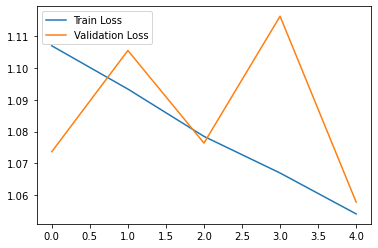

In [43]:
plt.plot(history.history['loss'],label = "Train Loss")
plt.plot(history.history['val_loss'],label = 'Validation Loss')
plt.legend()
plt.show()

In [44]:
prob_test = np.round(model.predict(encoded_test_reviews))
prob_test = pd.DataFrame(data = prob_test, columns = ['1', '2', '3','4','5'])
prob_test = prob_test.idxmax(axis = 1)

test_ratings_df = pd.DataFrame(data = test_ratings, columns = ['1', '2', '3','4','5'])
y_test_label = test_ratings_df.idxmax(axis = 1)

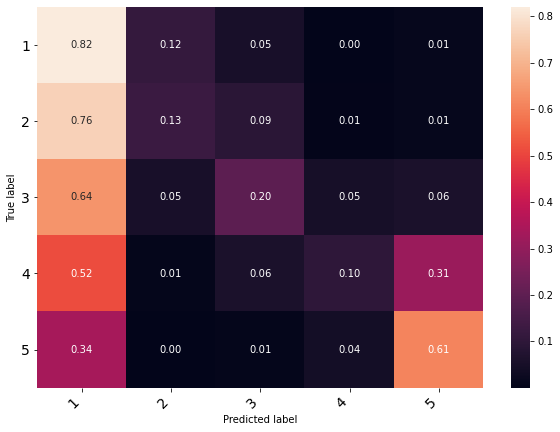

In [45]:
# Calculate confusion matrix
confusion_matrix_dnn = confusion_matrix(y_true = y_test_label, 
                    y_pred = prob_test)

# Turn matrix to percentages
confusion_matrix_dnn = confusion_matrix_dnn.astype('float') / confusion_matrix_dnn.sum(axis=1)[:, np.newaxis]

# Turn to dataframe
df_cm = pd.DataFrame(
        confusion_matrix_dnn, index=['1', '2', '3','4','5'],
         columns=['1', '2', '3','4','5'], 
)

# Parameters of the image
figsize = (10,7)
fontsize=14

# Create image
fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.2f')

# Make it nicer
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, 
                             ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45,
                             ha='right', fontsize=fontsize)

# Add labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Plot!
plt.show()